# Water Quality Prediction System (Rwanda Chapter)

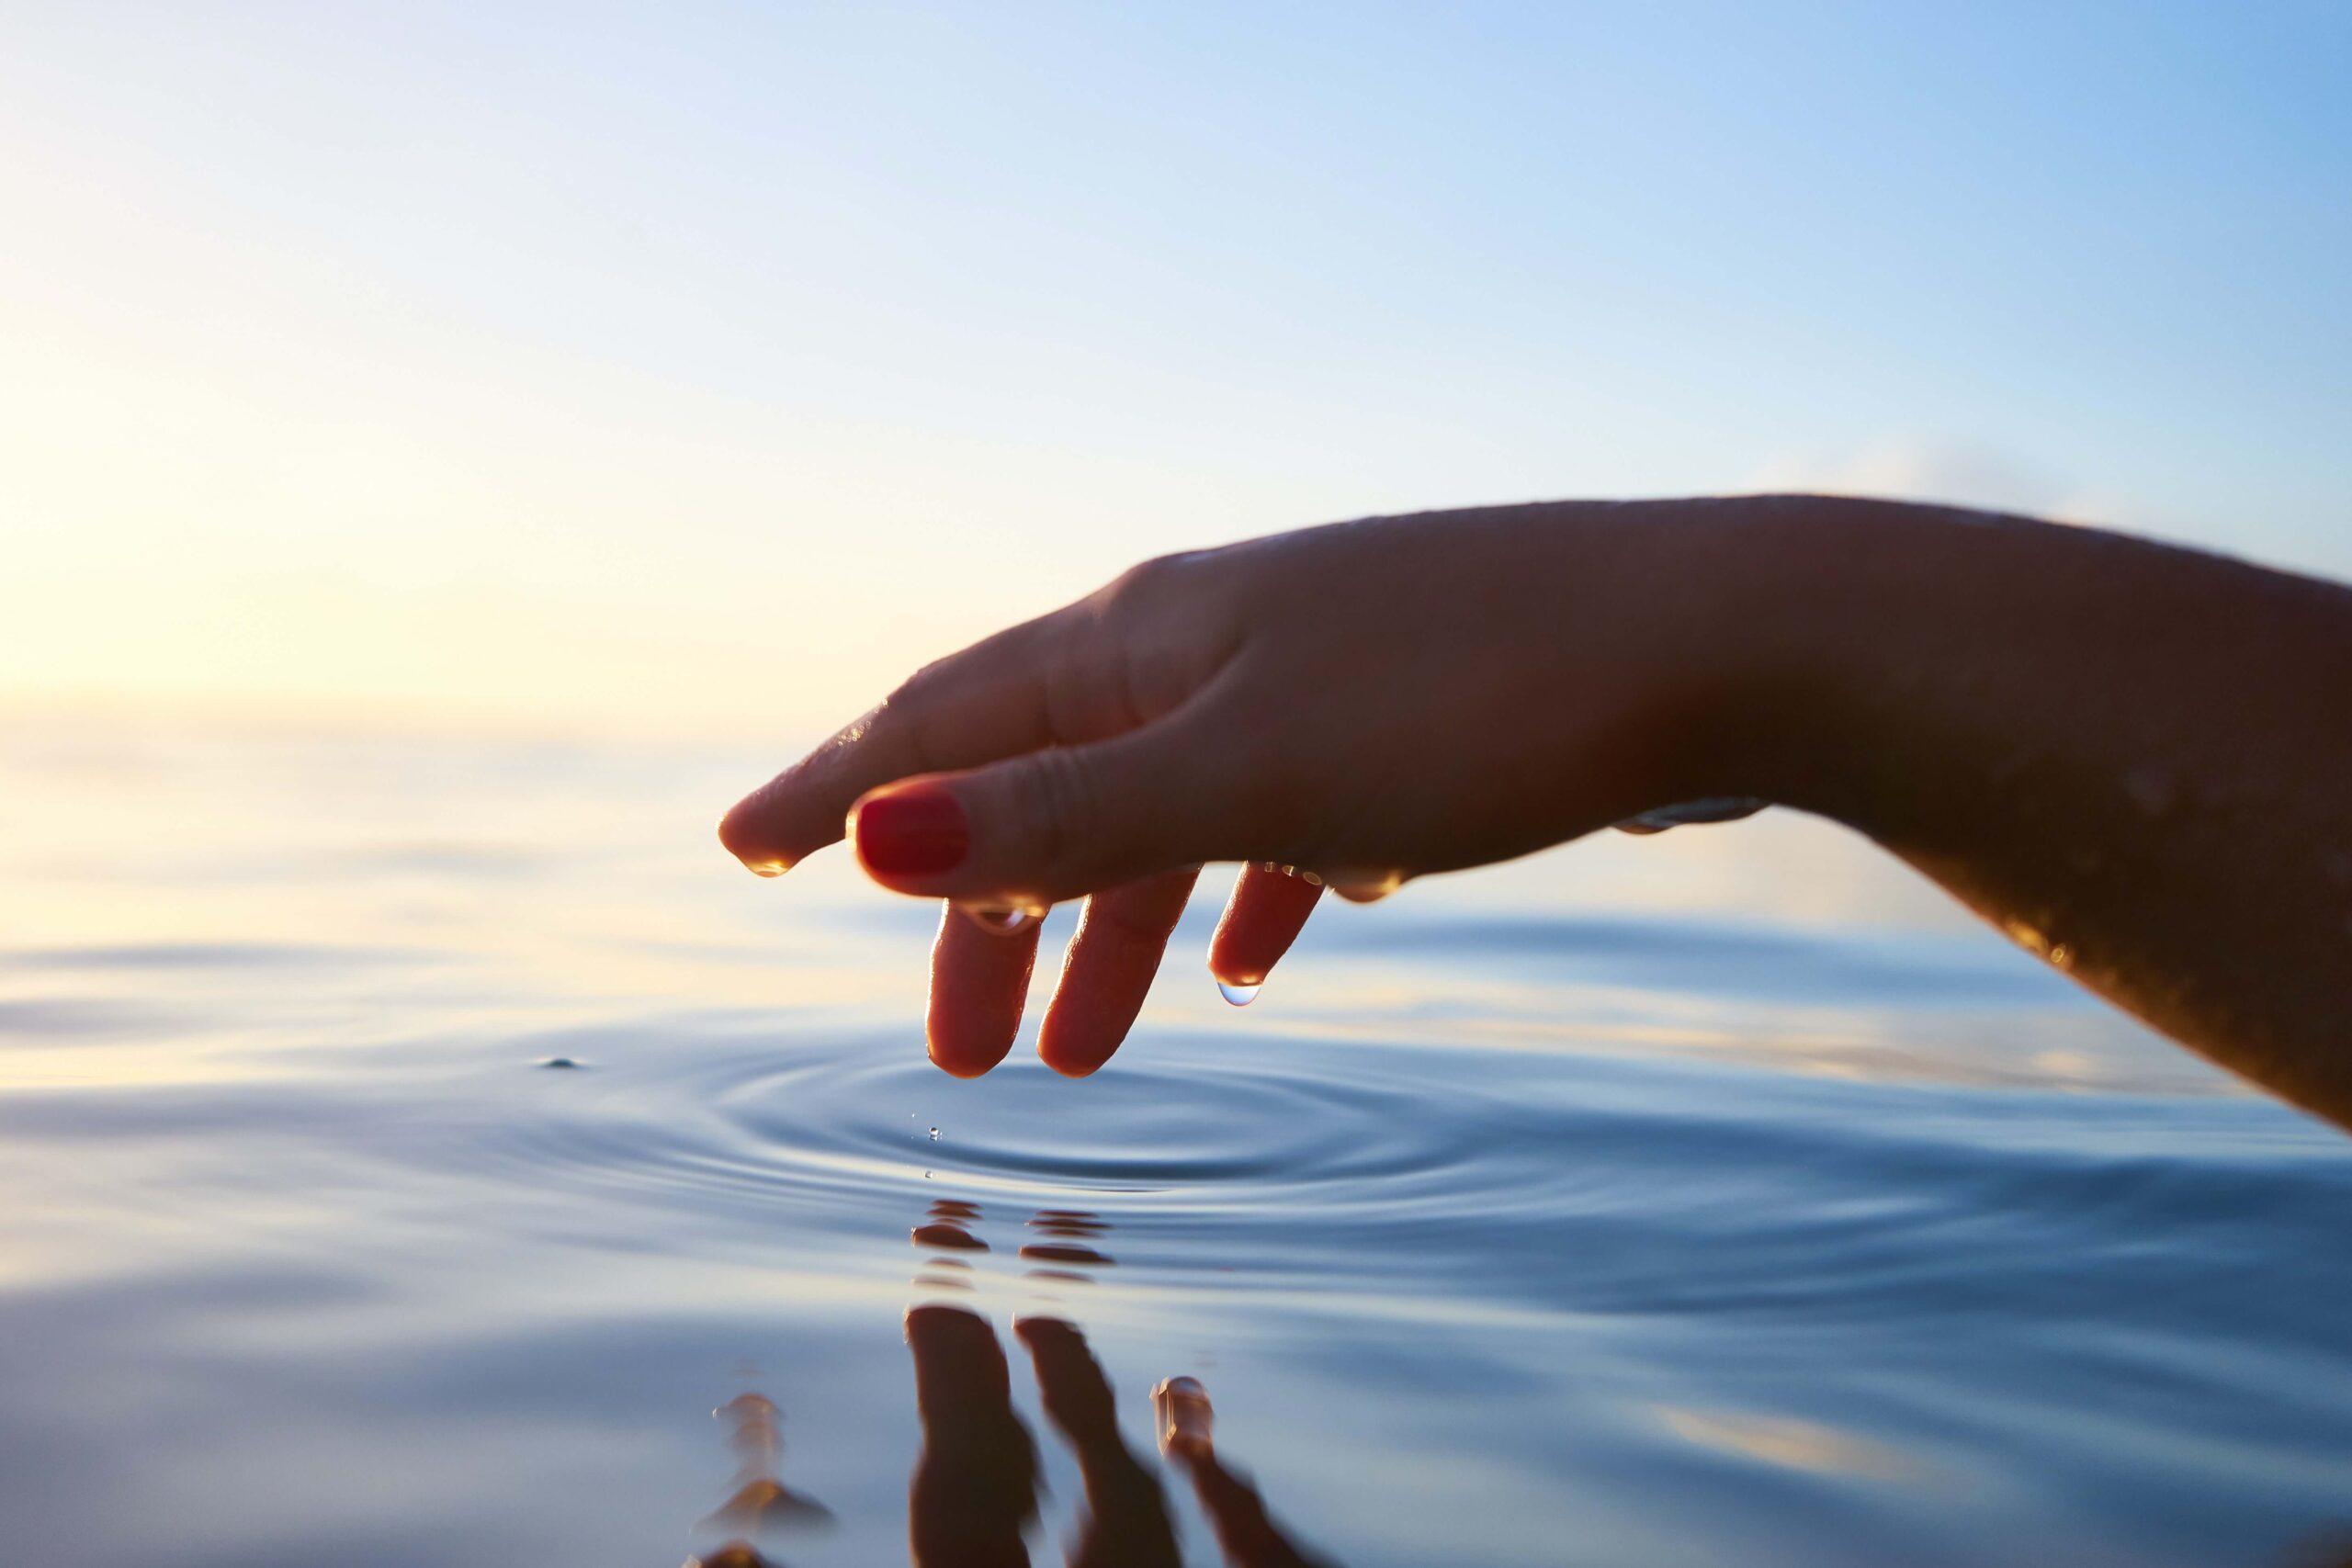

### Life Cycle or machine learning project

* Research previous work and Data Collection
* Data Collection
* Exploratory Data Analysis
* Preprocessing and feature engineering
* Model Development
* Model Training
* Model Analysis and Interpretation
* App Development


## 1.) Project Problem Statement

* Access to clean water is a critical challenge in many parts of the world, including Rwanda. Water quality prediction is important for ensuring the availability of safe and clean water for drinking, agriculture, and other purposes.
* However, traditional methods for water quality prediction are often time-consuming and costly, and they may not provide accurate and timely information. 
* To address this challenge, the Omdena Rwanda Chapter has initiated a project to develop an automated water quality prediction system using machine learning.

## 2.) Data Collection

* Data Source: https://drive.google.com/drive/folders/1_KJ09bHckVYVG_2ZHbRHIDCVtM04wpZI?usp=sharing
* The data consists of 18 columns and 10001 rows. 

## 2.1 Import Data and Required Libraries

#### NumPy, Pandas, Matplotlib, Seaborn, Warings and scikit learn Library 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')
import missingno as mno
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("C:/Users/chhot/Desktop/demo/ML_Project/notebook/data/Synthetic_Data_Water_Quality.csv")

## Show Top 5 Records

In [3]:
df.head()

Colour (TCU)  Turbidity (NTU)    pH  Conductivity (uS/cm)  \
0          8.34             3.39  8.06                819.00   
1         14.45             3.36  8.28               1371.10   
2          3.87             4.23  6.86                202.75   
3         14.57             1.75  7.00                696.16   
4          9.01             2.20  6.73                129.24   

   Total Dissolved Solids (mg/l)  Total Hardness (mg/l as CaCO3)  \
0                         787.15                          279.89   
1                         779.66                          112.04   
2                         485.10                          113.17   
3                         409.71                          140.39   
4                         343.55                            6.52   

   Aluminium (mg/l)  Chloride (mg/l)  Total Iron (mg/l)  Sodium (mg/l)  \
0              0.09           129.30               0.22          13.13   
1              0.20           163.73               0.13         127.48   
2              0.15            66.68               0.29         142.97   
3              0.06           102.42               0.15         194.07   
4              0.07           140.47               0.28           3.77   

   Sulphate (mg/l)  Zinc (mg/l)  Magnesium (mg/l)  Calcium (mg/l)  \
0            81.01         2.24             12.69          107.95   
1           307.99         4.05             52.01          107.12   
2            16.70         0.86             88.47          127.47   
3           393.09         2.60             61.36           99.16   
4           170.65         0.04             47.22          107.17   

   Potassium (mg/l)  Nitrate (mg/l)  Phosphate (mg/l) Potability  
0             17.50           22.23              0.41    potable  
1             45.28           16.06              0.68    potable  
2              4.90           19.81              0.91    potable  
3             36.73           42.82              0.02    potable  
4             44.79           14.35              2.08    potable

## Shape of the dataset

In [4]:
df.shape

(10000, 18)

## 2.2.) Dataset information
* pH : Acidity measure scale
* Aluminium (mg/l) : Minerals 
* Chloride (mg/l) : Minerals
* Iron (mg/l) : Minerals
* Sulphate (mg/l) : Minerals
* Zinc (mg/l) : Minerals
* Magnesium (mg/l) : Minerals	
* Calcium (mg/l) : Minerals	
* Potassium (mg/l) : Minerals	
* Nitrate (mg/l) : Minerals	
* Phosphate (mg/l) : Minerals
* Potability -> (potable/non-potable)

# 3.) Data Checks to perform


* Check Missing values
* Missing Value graph
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column
* Distribution of the Potability column


### 3.1 Check Missing values

In [5]:
df.isna().sum()

Colour (TCU)                      0
Turbidity (NTU)                   0
pH                                0
Conductivity (uS/cm)              0
Total Dissolved Solids (mg/l)     0
Total Hardness (mg/l as CaCO3)    0
Aluminium (mg/l)                  0
Chloride (mg/l)                   0
Total Iron (mg/l)                 0
Sodium (mg/l)                     0
Sulphate (mg/l)                   0
Zinc (mg/l)                       0
Magnesium (mg/l)                  0
Calcium (mg/l)                    0
Potassium (mg/l)                  0
Nitrate (mg/l)                    0
Phosphate (mg/l)                  0
Potability                        0
dtype: int64

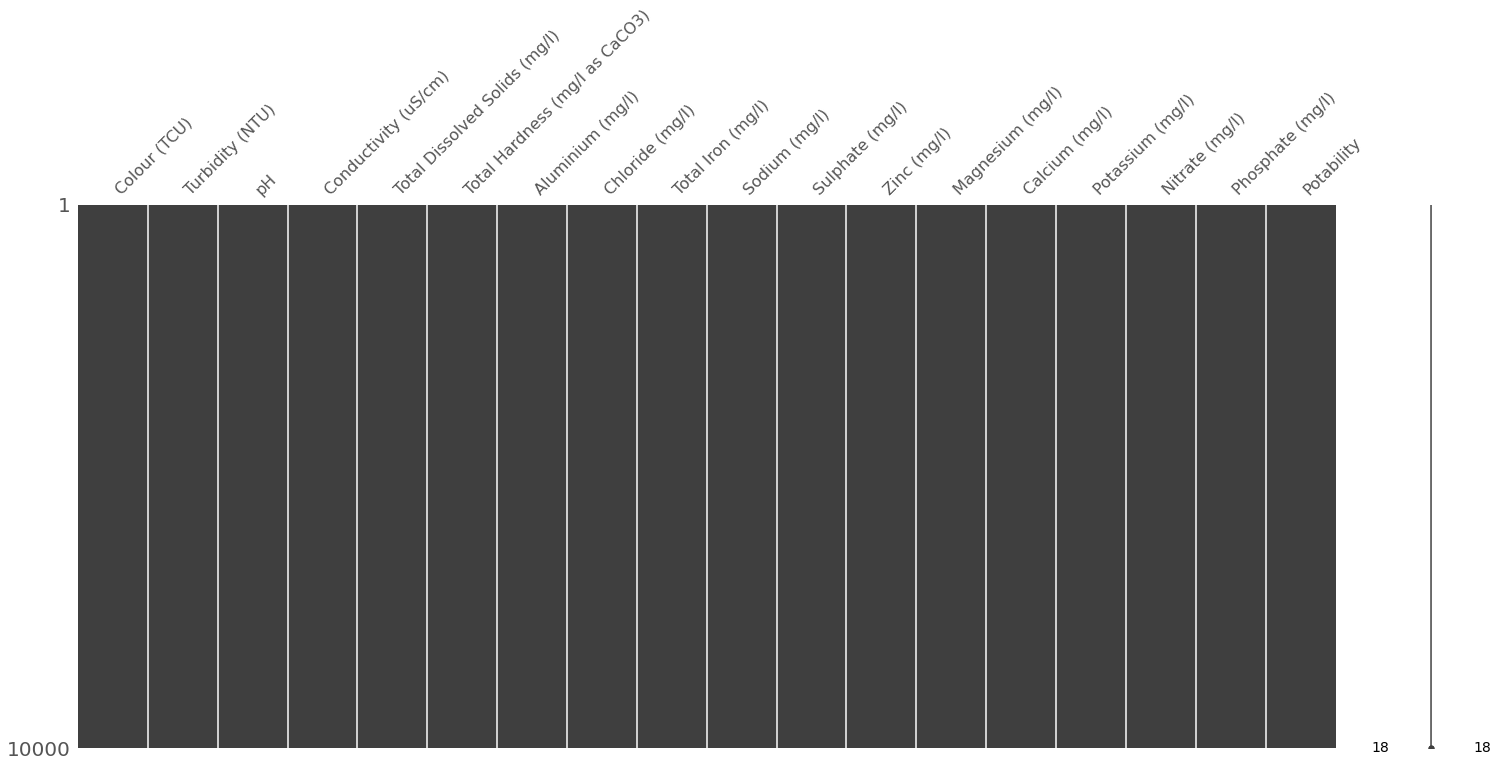

In [6]:
mno.matrix(df)
plt.show()

***There are no missing values in the dataset***

### 3.2) Check Duplicates

In [7]:
df.duplicated().sum()

0

***There are no duplicates values in the data set***

### 3.3) Check data types

In [8]:
# check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Colour (TCU)                    10000 non-null  float64
 1   Turbidity (NTU)                 10000 non-null  float64
 2   pH                              10000 non-null  float64
 3   Conductivity (uS/cm)            10000 non-null  float64
 4   Total Dissolved Solids (mg/l)   10000 non-null  float64
 5   Total Hardness (mg/l as CaCO3)  10000 non-null  float64
 6   Aluminium (mg/l)                10000 non-null  float64
 7   Chloride (mg/l)                 10000 non-null  float64
 8   Total Iron (mg/l)               10000 non-null  float64
 9   Sodium (mg/l)                   10000 non-null  float64
 10  Sulphate (mg/l)                 10000 non-null  float64
 11  Zinc (mg/l)                     10000 non-null  float64
 12  Magnesium (mg/l)                1

### 3.4) Checking the number of unique values of each column

In [9]:
df.nunique()

Colour (TCU)                      2907
Turbidity (NTU)                   1001
pH                                1375
Conductivity (uS/cm)              9824
Total Dissolved Solids (mg/l)     9745
Total Hardness (mg/l as CaCO3)    9218
Aluminium (mg/l)                    41
Chloride (mg/l)                   9049
Total Iron (mg/l)                   61
Sodium (mg/l)                     8811
Sulphate (mg/l)                   9386
Zinc (mg/l)                       1001
Magnesium (mg/l)                  7931
Calcium (mg/l)                    8488
Potassium (mg/l)                  6293
Nitrate (mg/l)                    6033
Phosphate (mg/l)                   441
Potability                           2
dtype: int64

#### Insights:
* Number of unique values are available in each column in our dataset

### 3.5) Check statistics of data set

In [10]:
df.describe().T

count         mean         std   min  \
Colour (TCU)                    10000.0    15.006526    8.717615  0.01   
Turbidity (NTU)                 10000.0     5.003388    2.906118  0.00   
pH                              10000.0     7.337763    3.101412  0.00   
Conductivity (uS/cm)            10000.0  1502.148272  869.812955  0.12   
Total Dissolved Solids (mg/l)   10000.0  1001.183584  578.522848  0.05   
Total Hardness (mg/l as CaCO3)  10000.0   300.613398  171.478482  0.03   
Aluminium (mg/l)                10000.0     0.200808    0.115359  0.00   
Chloride (mg/l)                 10000.0   249.491721  144.526095  0.00   
Total Iron (mg/l)               10000.0     0.300165    0.174572  0.00   
Sodium (mg/l)                   10000.0   200.793553  116.039382  0.01   
Sulphate (mg/l)                 10000.0   402.124054  230.187867  0.03   
Zinc (mg/l)                     10000.0     5.004608    2.897890  0.00   
Magnesium (mg/l)                10000.0   100.026299   57.979525  0.03   
Calcium (mg/l)                  10000.0   149.944522   87.162086  0.02   
Potassium (mg/l)                10000.0    49.838229   28.795520  0.00   
Nitrate (mg/l)                  10000.0    45.162176   25.861234  0.03   
Phosphate (mg/l)                10000.0     2.205561    1.274395  0.00   

                                     25%       50%        75%      max  
Colour (TCU)                      7.5175    15.000    22.6600    30.00  
Turbidity (NTU)                   2.4900     5.000     7.5300    10.00  
pH                                6.3975     7.470     8.4800    14.00  
Conductivity (uS/cm)            741.6350  1500.095  2259.7400  2999.91  
Total Dissolved Solids (mg/l)   494.5900  1000.030  1497.8800  1999.96  
Total Hardness (mg/l as CaCO3)  154.9800   300.005   448.6050   599.97  
Aluminium (mg/l)                  0.1000     0.200     0.3000     0.40  
Chloride (mg/l)                 122.7075   249.915   374.7600   499.87  
Total Iron (mg/l)                 0.1500     0.300     0.4500     0.60  
Sodium (mg/l)                    99.8900   199.995   303.6450   399.98  
Sulphate (mg/l)                 205.9100   400.125   601.9250   799.88  
Zinc (mg/l)                       2.4600     5.000     7.5000    10.00  
Magnesium (mg/l)                 49.3625   100.015   150.1300   199.98  
Calcium (mg/l)                   74.4175   150.010   226.2450   299.97  
Potassium (mg/l)                 24.4900    49.990    75.0400   100.00  
Nitrate (mg/l)                   23.1500    45.010    67.7725    90.00  
Phosphate (mg/l)                  1.0900     2.200     3.3200     4.40

#### Insight

* From above description of numerical data, all means are very close to each other - between 2.20 and 1502.14;
* All standard deviations are also close - between 1.27 and 869.81;
* While there is a minimum score 0 and maximum score 2999.91

### 3.6) Exploring Data

In [11]:
# Top 5 records
df.head()

Colour (TCU)  Turbidity (NTU)    pH  Conductivity (uS/cm)  \
0          8.34             3.39  8.06                819.00   
1         14.45             3.36  8.28               1371.10   
2          3.87             4.23  6.86                202.75   
3         14.57             1.75  7.00                696.16   
4          9.01             2.20  6.73                129.24   

   Total Dissolved Solids (mg/l)  Total Hardness (mg/l as CaCO3)  \
0                         787.15                          279.89   
1                         779.66                          112.04   
2                         485.10                          113.17   
3                         409.71                          140.39   
4                         343.55                            6.52   

   Aluminium (mg/l)  Chloride (mg/l)  Total Iron (mg/l)  Sodium (mg/l)  \
0              0.09           129.30               0.22          13.13   
1              0.20           163.73               0.13         127.48   
2              0.15            66.68               0.29         142.97   
3              0.06           102.42               0.15         194.07   
4              0.07           140.47               0.28           3.77   

   Sulphate (mg/l)  Zinc (mg/l)  Magnesium (mg/l)  Calcium (mg/l)  \
0            81.01         2.24             12.69          107.95   
1           307.99         4.05             52.01          107.12   
2            16.70         0.86             88.47          127.47   
3           393.09         2.60             61.36           99.16   
4           170.65         0.04             47.22          107.17   

   Potassium (mg/l)  Nitrate (mg/l)  Phosphate (mg/l) Potability  
0             17.50           22.23              0.41    potable  
1             45.28           16.06              0.68    potable  
2              4.90           19.81              0.91    potable  
3             36.73           42.82              0.02    potable  
4             44.79           14.35              2.08    potable

### 3.7) Find unique values in a column

In [12]:
print("Categories in 'potability' variable: ",end=" " )
print(df['Potability'].unique())

Categories in 'potability' variable:  ['potable' 'non-potable']


#### insights: 
* Two unique value in Potability column: ['potable' 'non-potable']

### 3.8) Define numerical and categorical columns in our dataset

In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features :   {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features :   {}'.format(len(categorical_features), categorical_features))

We have 17 numerical features :   ['Colour (TCU)', 'Turbidity (NTU)', 'pH', 'Conductivity (uS/cm)', 'Total Dissolved Solids (mg/l)', 'Total Hardness (mg/l as CaCO3)', 'Aluminium (mg/l)', 'Chloride (mg/l)', 'Total Iron (mg/l)', 'Sodium (mg/l)', 'Sulphate (mg/l)', 'Zinc (mg/l)', 'Magnesium (mg/l)', 'Calcium (mg/l)', 'Potassium (mg/l)', 'Nitrate (mg/l)', 'Phosphate (mg/l)']

We have 1 categorical features :   ['Potability']


#### Insights:
* 17 columns are numerical
* 01 column is categorical

### 3.9) Distribution of the Potability column

In [14]:
df['Potability'].value_counts()

potable        5000
non-potable    5000
Name: Potability, dtype: int64

#### Insights:
* potable and non-potable have equal values

### 3.10) column names in the dataset

In [15]:
df.columns

Index(['Colour (TCU)', 'Turbidity (NTU)', 'pH', 'Conductivity (uS/cm)',
       'Total Dissolved Solids (mg/l)', 'Total Hardness (mg/l as CaCO3)',
       'Aluminium (mg/l)', 'Chloride (mg/l)', 'Total Iron (mg/l)',
       'Sodium (mg/l)', 'Sulphate (mg/l)', 'Zinc (mg/l)', 'Magnesium (mg/l)',
       'Calcium (mg/l)', 'Potassium (mg/l)', 'Nitrate (mg/l)',
       'Phosphate (mg/l)', 'Potability'],
      dtype='object')

### 3.11) Extract Good_minerals and Bad_minerals in the dataset

In [16]:
# Extract columns based on two categories
extracted_columns = df[['Colour (TCU)', 'Turbidity (NTU)', 'pH', 'Conductivity (uS/cm)',
       'Total Dissolved Solids (mg/l)', 'Total Hardness (mg/l as CaCO3)',
       'Aluminium (mg/l)', 'Chloride (mg/l)', 'Total Iron (mg/l)',
       'Sodium (mg/l)', 'Sulphate (mg/l)', 'Zinc (mg/l)', 'Magnesium (mg/l)',
       'Calcium (mg/l)', 'Potassium (mg/l)', 'Nitrate (mg/l)',
       'Phosphate (mg/l)', 'Potability']] 

# Access the extracted columns
Good_minerals = extracted_columns.loc[:, ['Calcium (mg/l)', 'Potassium (mg/l)', 'Magnesium (mg/l)','Nitrate (mg/l)', 'Phosphate (mg/l)']].sort_values(["Calcium (mg/l)"], ascending=[True])
Bad_minerals = extracted_columns.loc[:, ["Colour (TCU)","Turbidity (NTU)","pH","Conductivity (uS/cm)","Total Dissolved Solids (mg/l)","Total Hardness (mg/l as CaCO3)","Aluminium (mg/l)","Chloride (mg/l)","Total Iron (mg/l)","Sodium (mg/l)","Sulphate (mg/l)","Zinc (mg/l)"]].sort_values([ 'Sodium (mg/l)'], ascending=[True])

# print the output
print(Good_minerals)
print("---------------------------------------------------------------------------------")
print(Bad_minerals)

      Calcium (mg/l)  Potassium (mg/l)  Magnesium (mg/l)  Nitrate (mg/l)  \
4898            0.02             42.34             67.74            6.40   
584             0.04              3.82             65.77           28.17   
3140            0.05             30.00             66.19           36.41   
975             0.06              0.21             79.85           26.43   
3150            0.10             43.94             61.23            2.41   
...              ...               ...               ...             ...   
8990          299.79             73.76            105.76           77.71   
8782          299.82             98.51            180.39           65.37   
6681          299.84             96.32            167.07           54.92   
6799          299.94             90.36            133.27           84.75   
9581          299.97             64.13            118.18           51.10   

      Phosphate (mg/l)  
4898              1.92  
584               1.49  
3140        

## Good minerals range in water
* *Calcium (mg/l) quantity is 0.02(min) to 299.97(max)*
* *Potassium (mg/l) quantity is 0.00(min) to 100.00(max)*
* *Nitrate (mg/l) (mg/l) quantity is 0.30(min) to 10.00(max)*
* *Magnesium (mg/l) quantity is 0.030(min) to 199.98(max)*
* *Phosphate (mg/l) quantity is 0.00(min) to 199.98(max)*

## Bad minerals range in water
* *Aluminium  (mg/l) quantity is 0.00(min) to 0.400(max)*
* *Chloride  (mg/l) quantity is 0.00(min) to 499.87(max)*
* *Total Iron (mg/l) quantity is 0.00(min) to 0.600(max)*
* *Sodium (mg/l) quantity is 0.010(min) to 399.98(max)*
* *Sulphate (mg/l) quantity is 0.030(min) to 799.88(max)*
* *Colour (TCU) quantity is 0.010(min) to 30.00(max)*
* *Turbidity (NTU) quantity is 0.00(min) to 10.00(max)*
* *pH quantity is 0.00(min) to 14.0(max)*
* *Conductivity (uS/cm) quantity is 0.120(min) to 2999.910(max)*
* *Total Dissolved Solids (mg/l) quantity is 0.050(min) to 1999.960(max)*
* *Zinc (mg/l) quantity is 0.00(min) to 10.00(max)*
* *Total Hardness (mg/l as CaCO3) quantity is 0.030(min) to 599.970(max)*

In [17]:
 df.head()

Colour (TCU)  Turbidity (NTU)    pH  Conductivity (uS/cm)  \
0          8.34             3.39  8.06                819.00   
1         14.45             3.36  8.28               1371.10   
2          3.87             4.23  6.86                202.75   
3         14.57             1.75  7.00                696.16   
4          9.01             2.20  6.73                129.24   

   Total Dissolved Solids (mg/l)  Total Hardness (mg/l as CaCO3)  \
0                         787.15                          279.89   
1                         779.66                          112.04   
2                         485.10                          113.17   
3                         409.71                          140.39   
4                         343.55                            6.52   

   Aluminium (mg/l)  Chloride (mg/l)  Total Iron (mg/l)  Sodium (mg/l)  \
0              0.09           129.30               0.22          13.13   
1              0.20           163.73               0.13         127.48   
2              0.15            66.68               0.29         142.97   
3              0.06           102.42               0.15         194.07   
4              0.07           140.47               0.28           3.77   

   Sulphate (mg/l)  Zinc (mg/l)  Magnesium (mg/l)  Calcium (mg/l)  \
0            81.01         2.24             12.69          107.95   
1           307.99         4.05             52.01          107.12   
2            16.70         0.86             88.47          127.47   
3           393.09         2.60             61.36           99.16   
4           170.65         0.04             47.22          107.17   

   Potassium (mg/l)  Nitrate (mg/l)  Phosphate (mg/l) Potability  
0             17.50           22.23              0.41    potable  
1             45.28           16.06              0.68    potable  
2              4.90           19.81              0.91    potable  
3             36.73           42.82              0.02    potable  
4             44.79           14.35              2.08    potable

## 4.) Exploring Data ( Visualization )
### 4.1 Visualize pH distribution to make some conclusion.

* Histogram
* Kernel Distribution Function (KDE)



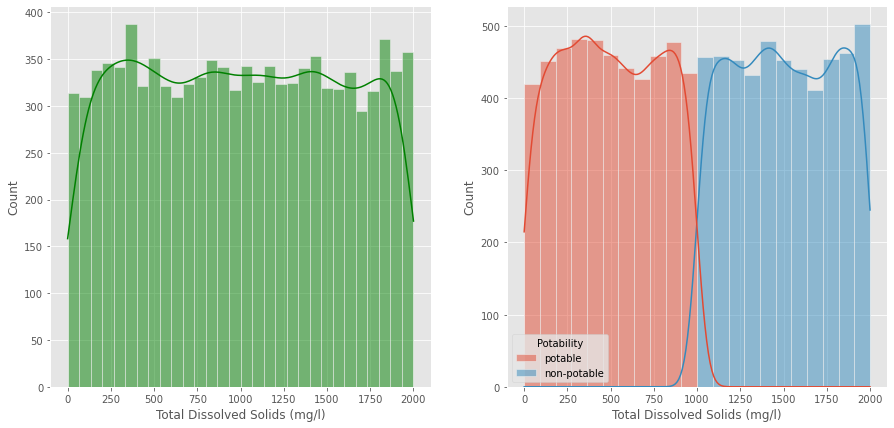

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total Dissolved Solids (mg/l)',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Dissolved Solids (mg/l)',kde=True,hue='Potability')
plt.show()

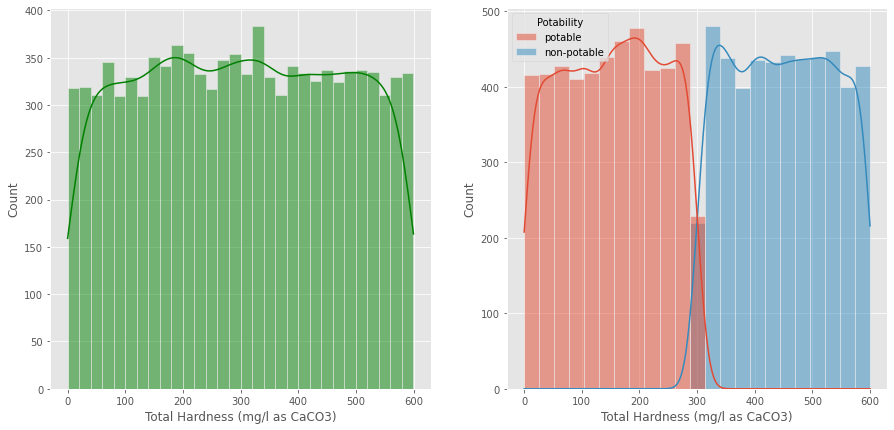

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Total Hardness (mg/l as CaCO3)',bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total Hardness (mg/l as CaCO3)',kde=True, hue='Potability')
plt.show()

#### Insight: 
* <span style="color:darkblue">non-potable is high in `"Total Dissolved Solids (mg/l)"`</span>
* <span style="color:darkred">non-potable is high in `"Total Hardness (mg/l as CaCO3)"` </span>

### 4.2) Point plot show Chloride (mg/l) with Potability

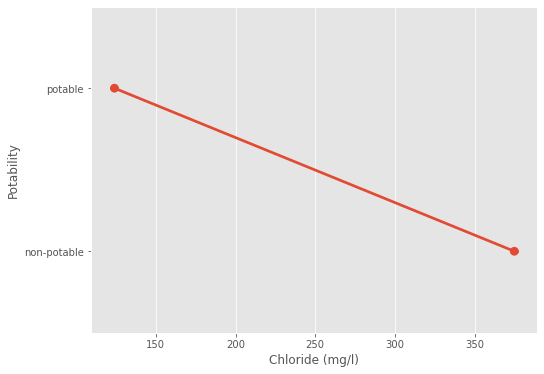

In [20]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Chloride (mg/l)', y='Potability', data=df)
plt.show()

#### Insight: 
* `Chloride (mg/l)` is low then it's potable 
* `Chloride (mg/l)` is high than it's non-potable 

###### Note
*Chloride - can cause dehydration and high blood pressure*

### 4.3) Pair Plot with two good minerals

<Figure size 576x432 with 0 Axes>

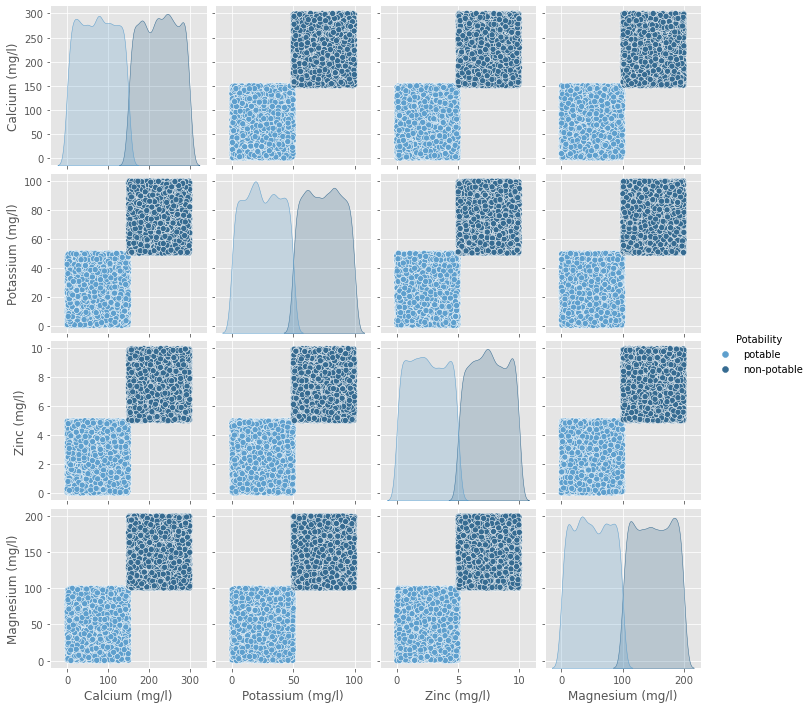

In [21]:
plt.figure(figsize=(8,6))
sns.pairplot(df, vars= ['Calcium (mg/l)', 'Potassium (mg/l)', 'Zinc (mg/l)', 'Magnesium (mg/l)'] , hue='Potability', palette='Blues_d')
plt.show()

### 4.4) Pair Plot with two bad minerals

<Figure size 576x432 with 0 Axes>

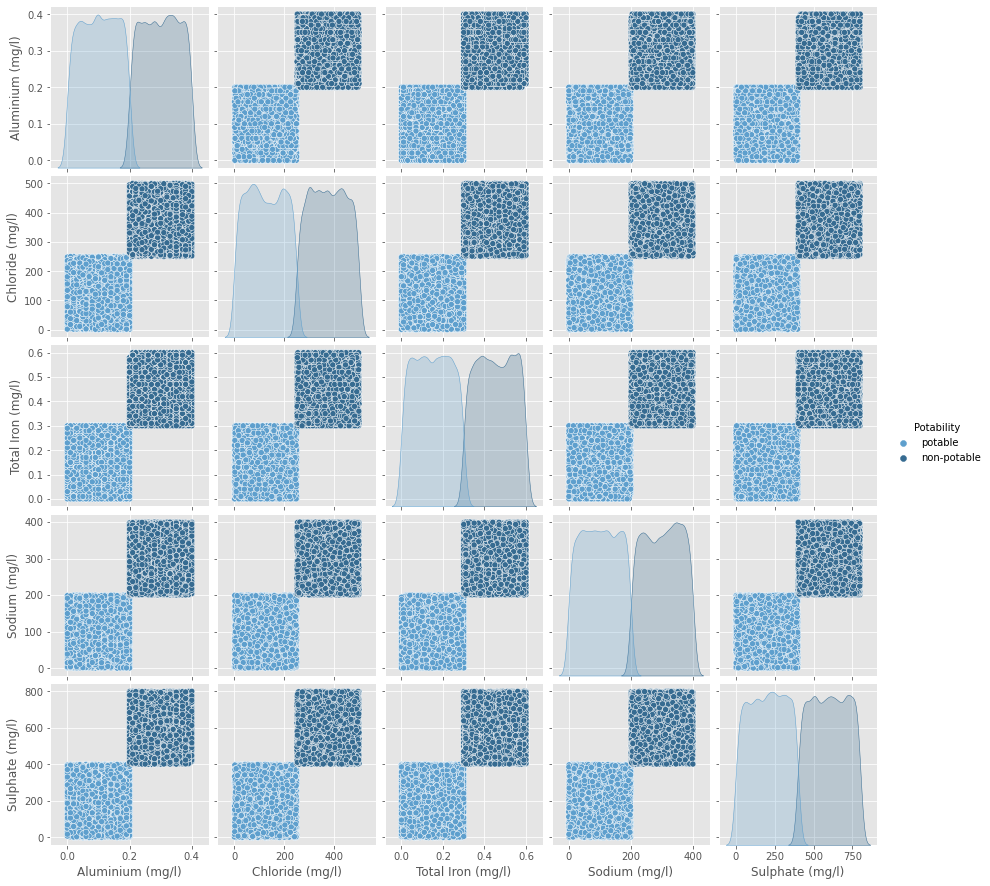

In [22]:
plt.figure(figsize=(8,6))
sns.pairplot(df, vars= ['Aluminium (mg/l)', 'Chloride (mg/l)', 'Total Iron (mg/l)', 'Sodium (mg/l)', 'Sulphate (mg/l)'] , hue='Potability' , palette='Blues_d')
plt.show()

### 4.5) Bar Plot

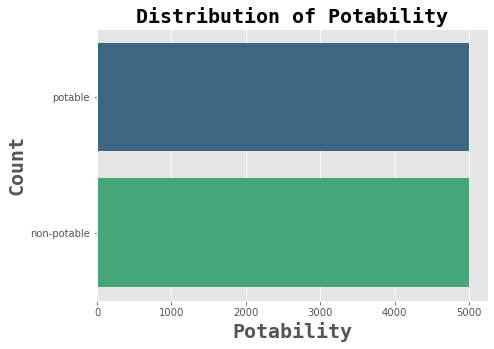

In [23]:
Potability = df['Potability'].value_counts()
plt.figure(figsize=(7,5))
sns.barplot(Potability.values, Potability.index, palette='viridis')
plt.title('Distribution of Potability', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Potability', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Count', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.tick_params(labelsize=10)
plt.show()

#### Insights:
* Distribution of Potability is equal in both potable and non-potable 

## 4.6) Correlation Matrix

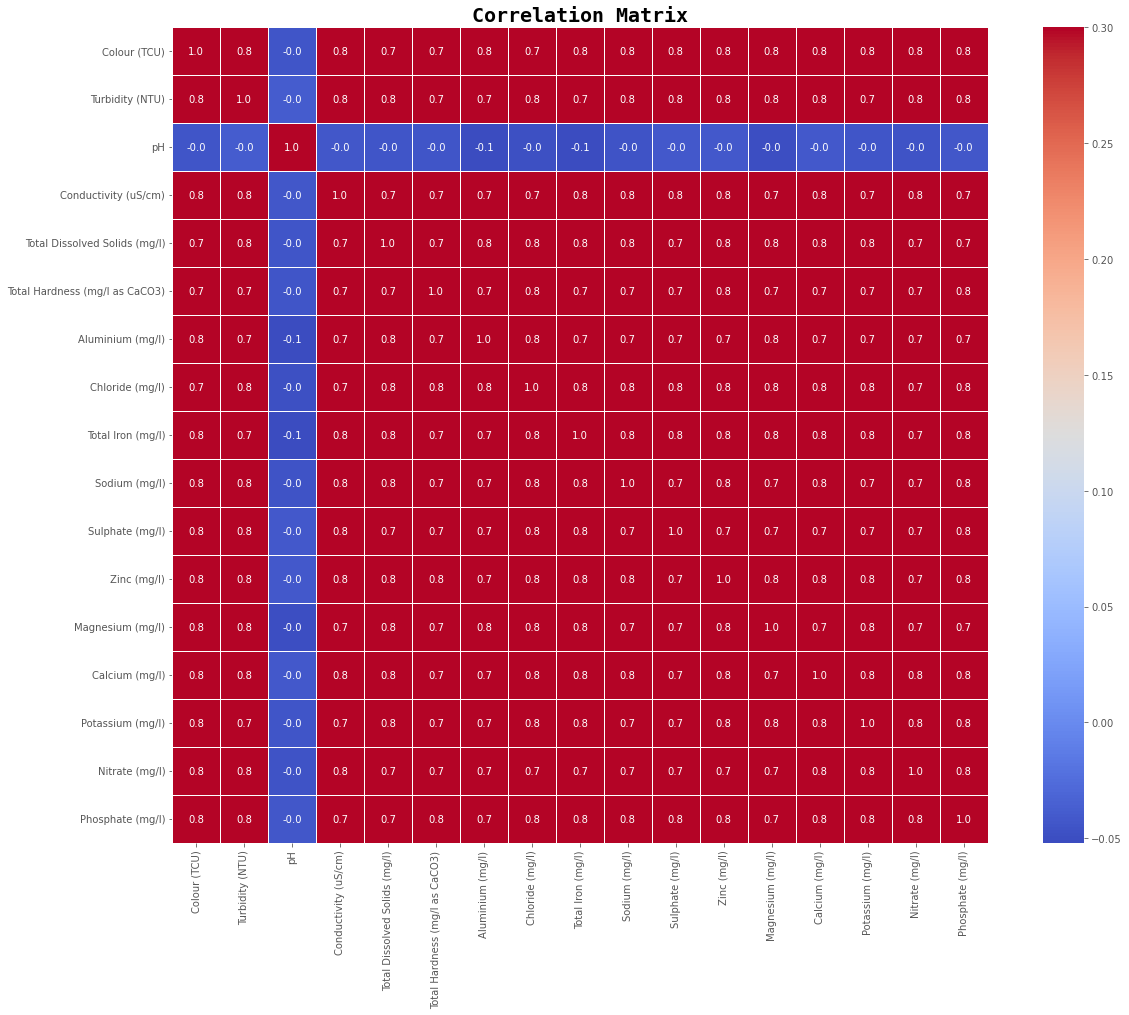

In [24]:
# Heatmap with correlation matrix
corr = df.corr()
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, vmax=0.3,
            cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('Correlation Matrix', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

#### Insight;
* pH column has low correlation than other

### 4.7) Dis plot with Good_minerals

In [25]:
cols = []
for g_col in Good_minerals.columns:
    if df[g_col].dtype == float:
        cols.append(g_col)
        
cols

['Calcium (mg/l)',
 'Potassium (mg/l)',
 'Magnesium (mg/l)',
 'Nitrate (mg/l)',
 'Phosphate (mg/l)']

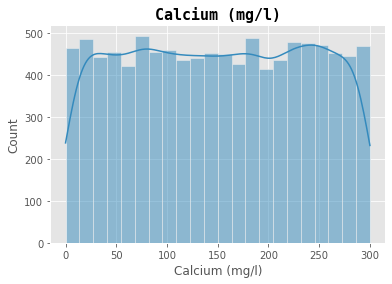

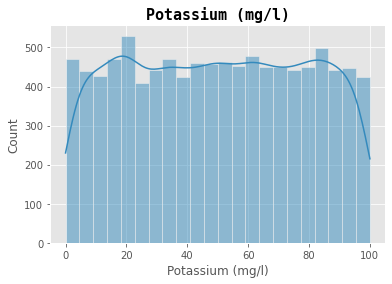

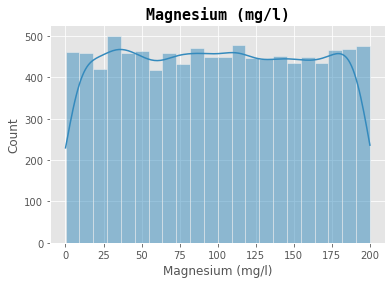

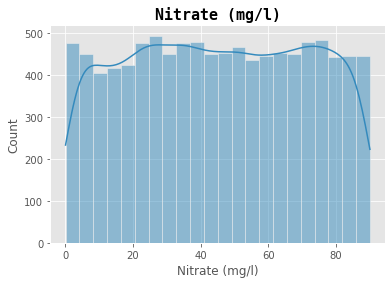

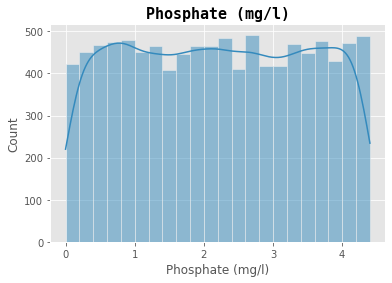

In [26]:
for g_col in cols:
    plt.figure()
    sns.histplot(data=df, x=g_col, kde=True)
    plt.title(g_col, fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
    plt.show()

#### Insights: 
* `'Potassium (mg/l)'` are more than 500 (mg/l) in the water
* `'Magnesium (mg/l)'` and `'Nitrate (mg/l)'` is appoox of 500 (mg/l) in the water
* `'Calcium (mg/l)'` and `'Phosphate (mg/l)'` is low of 500 (mg/l) in the water

### 4.8) Dist plot with Bad_minerals

In [27]:
cols = []
for b_col in Bad_minerals.columns:
    if df[b_col].dtype == float:
        cols.append(b_col)
        
cols

['Colour (TCU)',
 'Turbidity (NTU)',
 'pH',
 'Conductivity (uS/cm)',
 'Total Dissolved Solids (mg/l)',
 'Total Hardness (mg/l as CaCO3)',
 'Aluminium (mg/l)',
 'Chloride (mg/l)',
 'Total Iron (mg/l)',
 'Sodium (mg/l)',
 'Sulphate (mg/l)',
 'Zinc (mg/l)']

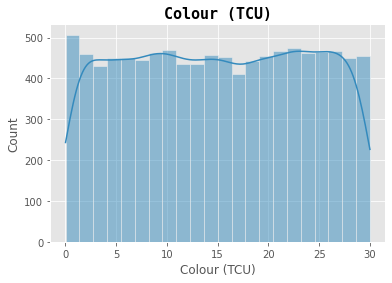

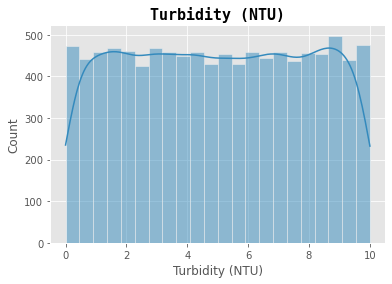

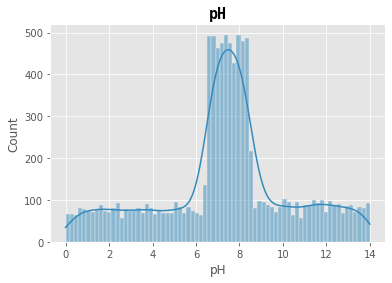

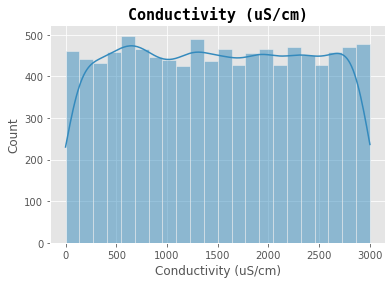

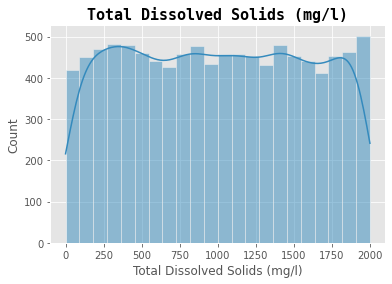

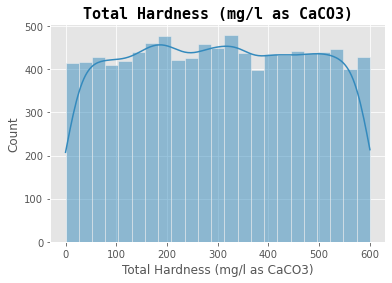

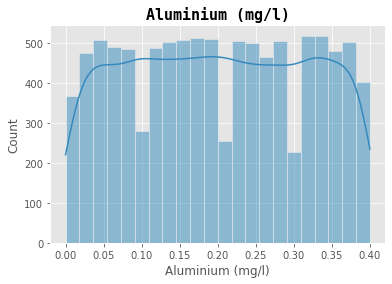

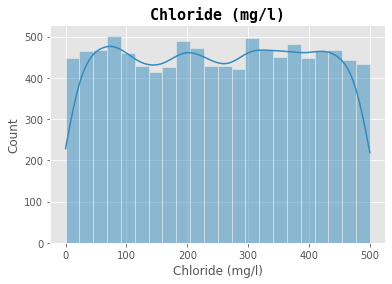

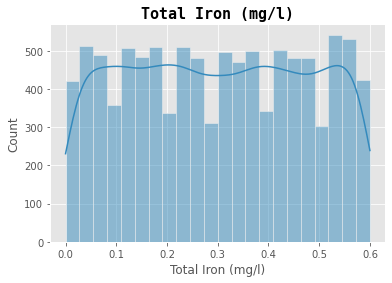

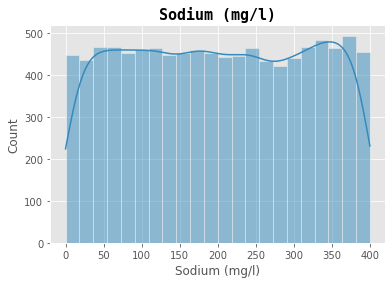

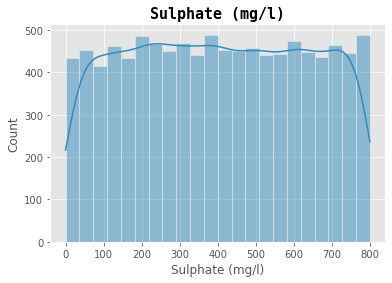

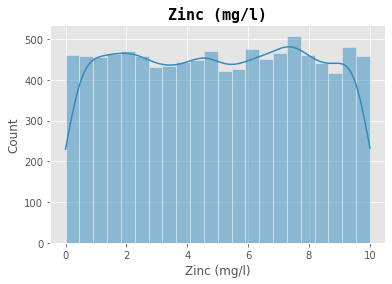

In [28]:
for b_col in cols:
    plt.figure()
    sns.histplot(data=df, x=b_col, kde=True)
    plt.title(b_col, fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
    plt.show()

#### Insights:
* `'Total Iron'`, `'Chloride'`, `'Zinc (mg/l)`, `'Color (TCU)` and `'Aluminium'` are more than 500 (mg/l) in the water.
* `'Sodium'`, `'Turbidity (NTU)'`, `'pH'`, `'Conductivity (uS/cm)'`, `'Total Hardness'`, `'Sodium'`, `'Total Dissolved Solids (mg/l)'` and `'Sulphate'` are also almost or less than 500 (mg/l) in the water (Bad_minerals).

### 4.9) histogram plots with pH and Potability

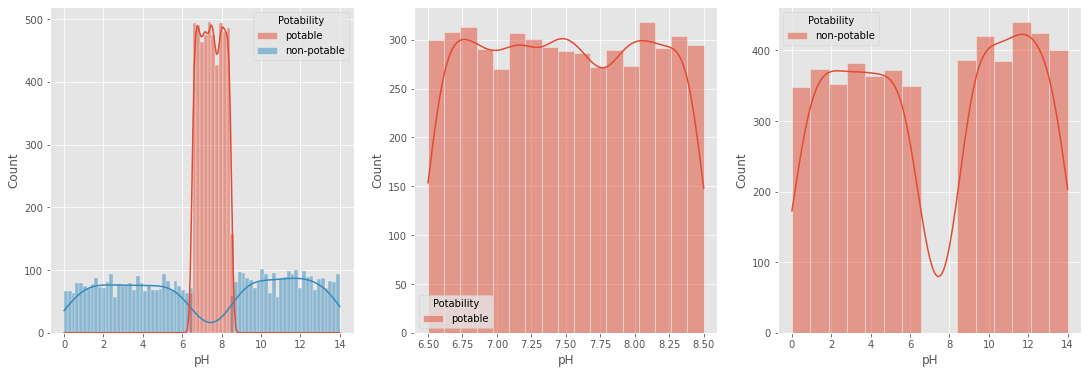

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df, x='pH', kde=True, hue='Potability')
plt.subplot(142)
ax =sns.histplot(data=df[df.Potability=='potable'], x='pH', kde=True, hue='Potability')
plt.subplot(143)
ax =sns.histplot(data=df[df.Potability=='non-potable'], x='pH', kde=True, hue='Potability')
plt.show()


#### Insights:
* pH is almost 7 in our column so it's potable for us.

### 4.10) Violin Plot with some columns

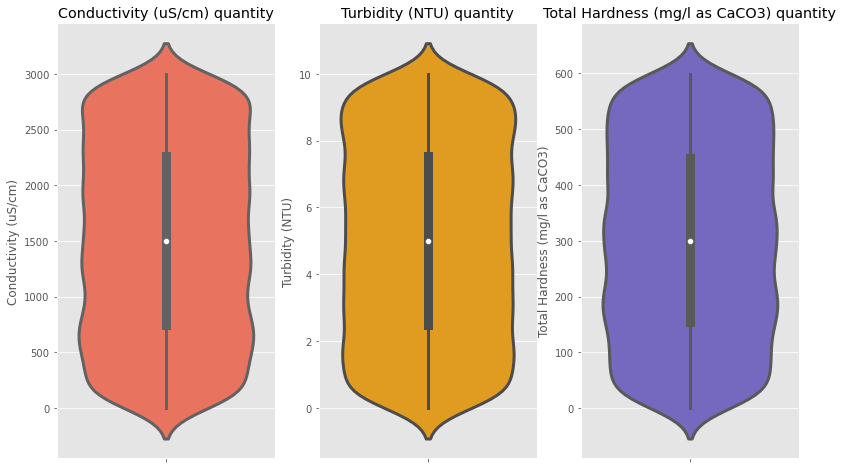

In [30]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Conductivity (uS/cm) quantity')
sns.violinplot(y='Conductivity (uS/cm)',data=df, color='tomato', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Turbidity (NTU) quantity')
sns.violinplot(y='Turbidity (NTU)',data=df, color='orange', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Total Hardness (mg/l as CaCO3) quantity')
sns.violinplot(y='Total Hardness (mg/l as CaCO3)',data=df, color='slateblue', linewidth=3)
plt.show()

#### Insights:
* From the above three plots its clearly visible that most of the water components in between 1000-2000 in Conductivity (uS/cm) whereas in Turbidity (NTU) most of them score from 4-6 and in Total Hardness (mg/l as CaCO3) most of them score from 200-400.

###  4.11) CHECKING OUTLIERS

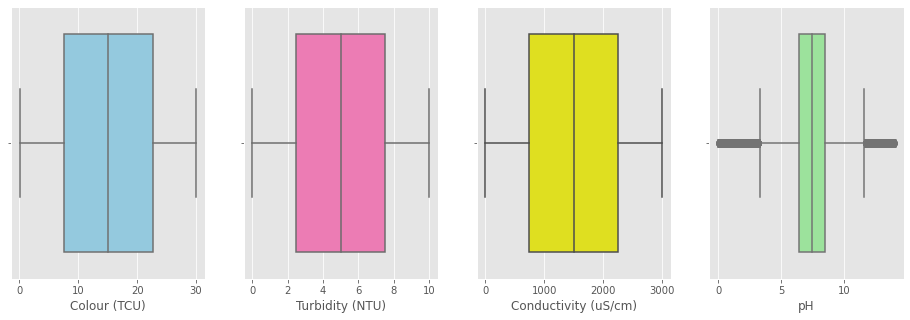

In [31]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Colour (TCU)'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['Turbidity (NTU)'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['Conductivity (uS/cm)'], color='yellow')
plt.subplot(144)
sns.boxplot(df['pH'],color='lightgreen')
plt.show()


#### Insights:
* `pH` has outliers 

### 4.12) Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

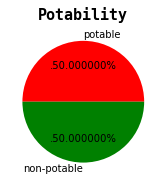

In [32]:
plt.subplot(1,2,1)
size = df['Potability'].value_counts()
labels = 'potable', 'non-potable'
color = ['red','green']

plt.pie(size, colors = color,labels = labels, autopct = '.%2f%%')
plt.title('Potability', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.axis('off')


#### Insight:
* potable and non-potable is equal in Potability  

### 4.13) UNIVARIATE ANALYSIS ( Which type of Potability is most common amoung Turbidity (NTU) ? )

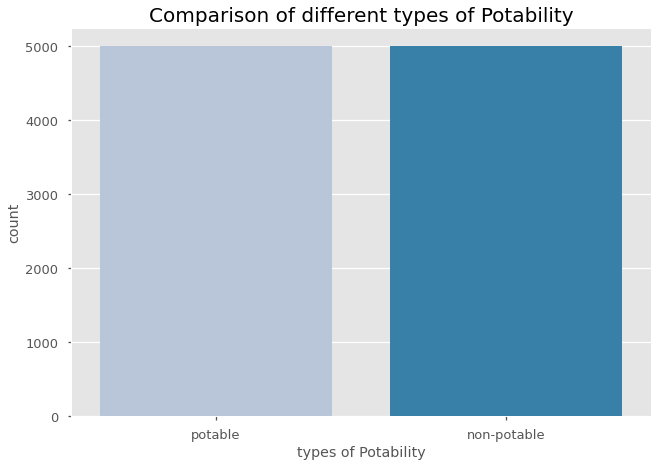

In [33]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['Potability'], palette = 'PuBu')
plt.title('Comparison of different types of Potability', fontweight = 30, fontsize = 20)
plt.xlabel('types of Potability')
plt.ylabel('count')
plt.show()

#### Insight:
* potable and non-potable is same 

### 4.14) MUTIVARIATE ANALYSIS USING PAIRPLOT 

In [ ]:
plt.figure(figsize=(20,15))
sns.pairplot(df, hue = 'Potability')
plt.show()

<Figure size 1440x1080 with 0 Axes>

#### Insight:
* From the above plot it is clear that all the quantity increase/same linearly with each other.

### 5. Conclusions

*    Water quality prediction is related with Potability, Good_minerals, Bad_minerals.
*    Good minerals are is less and Bad minerals are more in the water. 
*    We need to check minerals of water which we can filter. i.e. pH, Hardness, Chloride etc.
*    Finishing water quality is benefitial.
